# Sentiment Analysis Using Naive Bayes, Logistic Regression and SVM using Vader Data

Columns in the DataFrame: ['cleaned_title', 'Sentiment']

Missing Values in 'cleaned_title': 35

Naive Bayes Results:
Accuracy: 0.6550
Precision: 0.5731
F1 Score: 0.5832
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        33
           0       0.62      0.95      0.75       108
           1       0.80      0.47      0.60        59

    accuracy                           0.66       200
   macro avg       0.47      0.48      0.45       200
weighted avg       0.57      0.66      0.58       200

Confusion Matrix (Naive Bayes):
[[  0  31   2]
 [  0 103   5]
 [  0  31  28]]

Logistic Regression Results:
Accuracy: 0.6700
Precision: 0.7460
F1 Score: 0.6110
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          -1       1.00      0.06      0.11        33
           0       0.64      0.95      0.76       108
           1       0.81      0.49      0.61 

C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

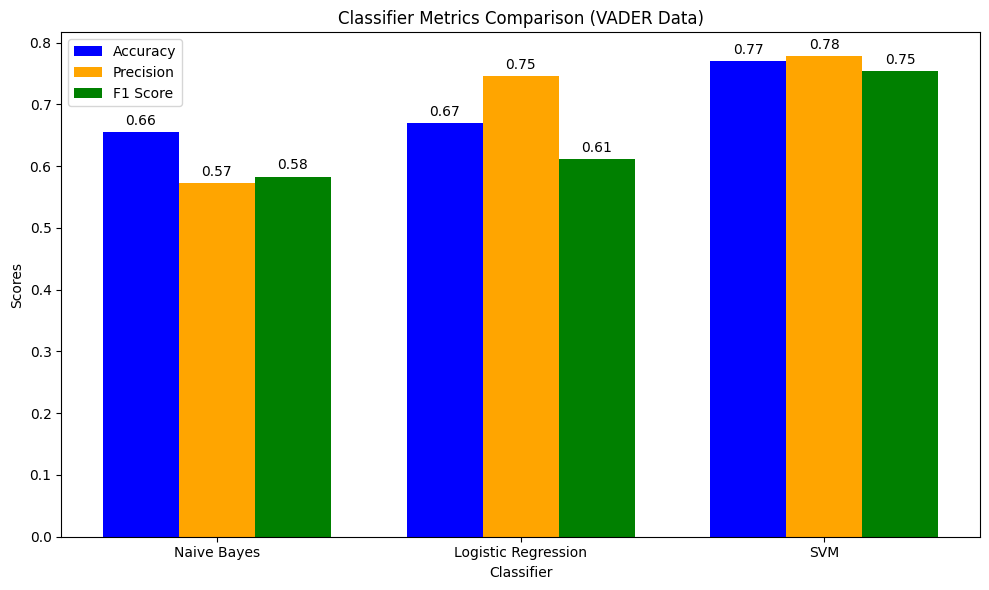

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Vader sentiment data
df = pd.read_csv("hogwarts_vader_sentiments.csv")

# Verify the columns
print("Columns in the DataFrame:", df.columns.tolist())

# Check for missing values in 'cleaned_title'
print("\nMissing Values in 'cleaned_title':", df['cleaned_title'].isnull().sum())

# Handle missing values in 'cleaned_title' by replacing NaN with an empty string
df['cleaned_title'] = df['cleaned_title'].fillna("")

# Prepare features and target
X = df['cleaned_title']  # Features (text data)
y = df['Sentiment'].map({"Positive": 1, "Negative": -1, "Neutral": 0})  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dictionary to store metrics for each classifier
metrics = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "F1 Score": []
}

# --- Naive Bayes Model ---
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)
metrics["Classifier"].append("Naive Bayes")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_nb))
metrics["Precision"].append(precision_score(y_test, y_pred_nb, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_nb, average="weighted", zero_division=0))

print("\nNaive Bayes Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))

# --- Logistic Regression Model ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
metrics["Classifier"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_lr))
metrics["Precision"].append(precision_score(y_test, y_pred_lr, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_lr, average="weighted", zero_division=0))

print("\nLogistic Regression Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

# --- Support Vector Machine Model ---
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for SVM
y_pred_svm = svm_model.predict(X_test_tfidf)
metrics["Classifier"].append("SVM")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
metrics["Precision"].append(precision_score(y_test, y_pred_svm, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_svm, average="weighted", zero_division=0))

print("\nSVM Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

# Convert metrics dictionary to DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics)

# --- Plot Bar Graph for Metrics ---
labels = metrics_df["Classifier"]
x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for Accuracy, Precision, and F1 Score
bars1 = ax.bar(x - width, metrics_df["Accuracy"], width, label="Accuracy", color="blue")
bars2 = ax.bar(x, metrics_df["Precision"], width, label="Precision", color="orange")
bars3 = ax.bar(x + width, metrics_df["F1 Score"], width, label="F1 Score", color="green")

# Add text for labels, title, and axes
ax.set_xlabel("Classifier")
ax.set_ylabel("Scores")
ax.set_title("Classifier Metrics Comparison (VADER Data)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()


# Sentiment Analysis Using Naive Bayes, Logistic Regression and SVM with BERT Data


Columns in the DataFrame: ['cleaned_title', 'Sentiment']

Missing Values in 'cleaned_title': 35

Naive Bayes Results:
Accuracy: 0.7150
Precision: 0.6570
F1 Score: 0.6052
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.71      1.00      0.83       141
           1       1.00      0.06      0.12        31

    accuracy                           0.71       200
   macro avg       0.57      0.35      0.32       200
weighted avg       0.66      0.71      0.61       200

Confusion Matrix (Naive Bayes):
[[  0  28   0]
 [  0 141   0]
 [  0  29   2]]

Logistic Regression Results:
Accuracy: 0.7300
Precision: 0.6648
F1 Score: 0.6348
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        28
           0       0.72      1.00      0.84       141
           1       1.00      0.16      0.28 

C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

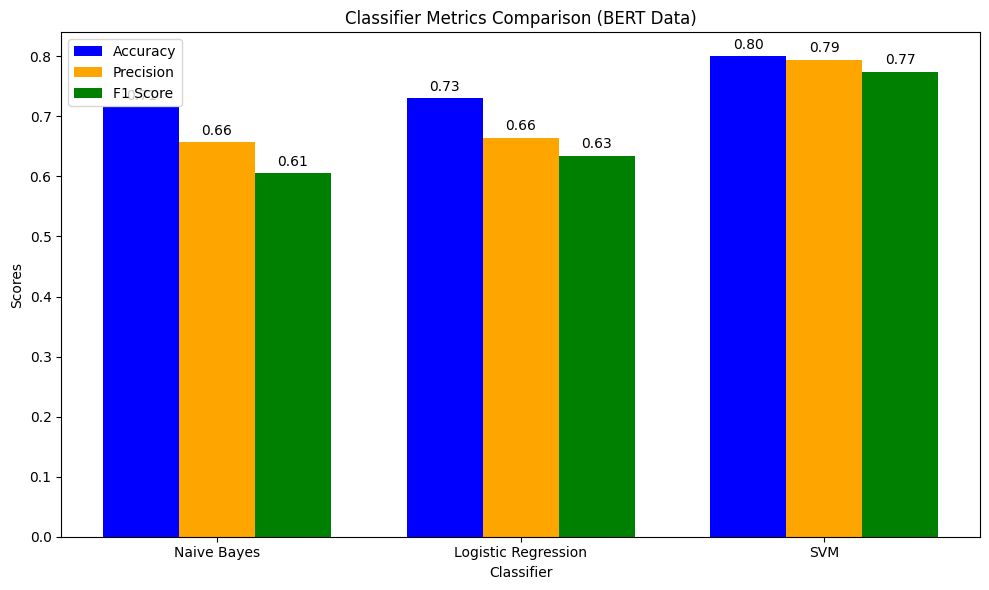

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the BERT sentiment data
df = pd.read_csv("hogwarts_bert_sentiments.csv")

# Verify the columns
print("Columns in the DataFrame:", df.columns.tolist())

# Check for missing values in 'cleaned_title'
print("\nMissing Values in 'cleaned_title':", df['cleaned_title'].isnull().sum())

# Handle missing values in 'cleaned_title' by replacing NaN with an empty string
df['cleaned_title'] = df['cleaned_title'].fillna("")

# Prepare features and target
X = df['cleaned_title']  # Features (text data)
y = df['Sentiment'].map({"Positive": 1, "Negative": -1, "Neutral": 0})  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dictionary to store metrics for each classifier
metrics = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "F1 Score": []
}

# --- Naive Bayes Model ---
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)
metrics["Classifier"].append("Naive Bayes")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_nb))
metrics["Precision"].append(precision_score(y_test, y_pred_nb, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_nb, average="weighted", zero_division=0))

print("\nNaive Bayes Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, y_pred_nb))

# --- Logistic Regression Model ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
metrics["Classifier"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_lr))
metrics["Precision"].append(precision_score(y_test, y_pred_lr, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_lr, average="weighted", zero_division=0))

print("\nLogistic Regression Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))

# --- Support Vector Machine Model ---
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train_tfidf, y_train)

# Predictions and evaluation for SVM
y_pred_svm = svm_model.predict(X_test_tfidf)
metrics["Classifier"].append("SVM")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_svm))
metrics["Precision"].append(precision_score(y_test, y_pred_svm, average="weighted", zero_division=0))
metrics["F1 Score"].append(f1_score(y_test, y_pred_svm, average="weighted", zero_division=0))

print("\nSVM Results:")
print(f"Accuracy: {metrics['Accuracy'][-1]:.4f}")
print(f"Precision: {metrics['Precision'][-1]:.4f}")
print(f"F1 Score: {metrics['F1 Score'][-1]:.4f}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

# Convert metrics dictionary to DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics)

# --- Plot Bar Graph for Metrics ---
labels = metrics_df["Classifier"]
x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for Accuracy, Precision, and F1 Score
bars1 = ax.bar(x - width, metrics_df["Accuracy"], width, label="Accuracy", color="blue")
bars2 = ax.bar(x, metrics_df["Precision"], width, label="Precision", color="orange")
bars3 = ax.bar(x + width, metrics_df["F1 Score"], width, label="F1 Score", color="green")

# Add text for labels, title, and axes
ax.set_xlabel("Classifier")
ax.set_ylabel("Scores")
ax.set_title("Classifier Metrics Comparison (BERT Data)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()
